In [7]:
import sys
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# import custom modules
sys.path.append('../../utils')
import data_paths

In [8]:
# import inventory data 
hot2023 = gpd.read_file(data_paths.INVENTORY_PATH + 'GNFR_F_2023_100m_hot.gpkg')
hot2024 = gpd.read_file(data_paths.INVENTORY_PATH + 'GNFR_F_2024_100m_hot.gpkg')
cold2023 = gpd.read_file(data_paths.INVENTORY_PATH + 'GNFR_F_2023_100m_cold.gpkg')
cold2024 = gpd.read_file(data_paths.INVENTORY_PATH + 'GNFR_F_2024_100m_cold.gpkg')



In [9]:
def load_temp_profile(year, component, type='hot'):
    """Load the temporal profile data."""
    folderpath = data_paths.INVENTORY_PATH + 'temporal_profiles/'
    
    if type == 'cold':
        filename = f'cold_start_temporal_profile_{component}_{year}.csv'
        temp_profile = pd.read_csv(folderpath + filename, index_col=0)
        temp_profile.index = pd.to_datetime(temp_profile.index)
    else:
        filename = f'temporal_profile_{component}_{year}.csv'
        temp_profile = pd.read_csv(folderpath + filename)
        temp_profile = temp_profile[temp_profile['component']== component]
        temp_profile.index = pd.to_datetime(temp_profile.timestamp)
        temp_profile = temp_profile.drop(columns=['component', 'year', 'timestamp'])
        
    return temp_profile

# Investigate the ratios at Landshuter Allee

In [10]:
# IDs for Landshuter Allee
# landshuter allee
lanc = [15801, 15802, 15781, 15782, 15791, 15792, 15771, 15772, 15811, 15812]
#lanc = [17569, 17570, 17579, 17580, 17559, 17560]

In [11]:
co2_2023 = load_temp_profile('2023', 'CO2(rep)', 'hot')
co2_2024 = load_temp_profile('2024', 'CO2(rep)', 'hot')
co2 = pd.concat([(co2_2023 * hot2023.loc[lanc, 'CO2(rep)'].sum()/len(co2_2023)), 
                (co2_2024 *hot2024.loc[lanc, 'CO2(rep)'].sum()/len(co2_2024))], axis=0)

nox_2023 = load_temp_profile('2023', 'NOx', 'hot')
nox_2024 = load_temp_profile('2024', 'NOx', 'hot')
nox = pd.concat([(nox_2023 * hot2023.loc[lanc, 'NOx'].sum()/len(nox_2023)), 
                (nox_2024 *hot2024.loc[lanc, 'NOx'].sum()/len(nox_2024))], axis=0)

co2_cold_2023 = load_temp_profile('2023', 'CO2(rep)', 'cold')
co2_cold_2024 = load_temp_profile('2024', 'CO2(rep)', 'cold')
co2_cold = pd.concat([(co2_cold_2023 * cold2023.loc[lanc, 'CO2(rep)'].sum()/len(co2_cold_2023)), 
                (co2_cold_2024*cold2024.loc[lanc, 'CO2(rep)'].sum()/len(co2_cold_2024))], axis=0)

nox_cold_2023 = load_temp_profile('2023', 'NOx', 'cold')
nox_cold_2024 = load_temp_profile('2024', 'NOx', 'cold')
nox_cold = pd.concat([(nox_cold_2023 * cold2023.loc[lanc, 'NOx'].sum()/len(nox_cold_2023)), 
                (nox_cold_2024*cold2024.loc[lanc, 'NOx'].sum()/len(nox_cold_2024))], axis=0)

In [12]:
s = '2023-11-01'
e = '2024-03-31'

ratio = (co2.loc[s:e, 'scaling_factor'].sum() + co2_cold.loc[s:e, 'CO2(rep)'].sum()) / \
    (nox.loc[s:e, 'scaling_factor'].sum() + nox_cold.loc[s:e, 'NOx'].sum())
    
print(f'CO2/NOx ratio: {ratio:.2f}')

CO2/NOx ratio: 607.05


In [13]:
# export gpkg for validation
#i = 0
#for d in [hot2023, hot2024, cold2023, cold2024]:
#    d = d.loc[lanc]
 #   d.to_file('/Users/daniel_tum/Desktop/' + f'validate_{i}.gpkg', driver='GPKG')
    
#    i+=1


# Investiage Ratios for whole city

In [64]:
co2_2023 = load_temp_profile('2023', 'CO2(rep)', 'hot')
co2_2024 = load_temp_profile('2024', 'CO2(rep)', 'hot')
co2 = pd.concat([(co2_2023 * hot2023['CO2(rep)'].sum()/len(co2_2023)), 
                (co2_2024 *hot2024['CO2(rep)'].sum()/len(co2_2024))], axis=0)

co2_cold_2023 = load_temp_profile('2023', 'CO2(rep)', 'cold')
co2_cold_2024 = load_temp_profile('2024', 'CO2(rep)', 'cold')
co2_cold = pd.concat([(co2_cold_2023 * cold2023.loc[lanc, 'CO2(rep)'].sum()/len(co2_cold_2023)), 
                (co2_cold_2024*cold2024.loc[lanc, 'CO2(rep)'].sum()/len(co2_cold_2024))], axis=0)

co2 = pd.concat([co2, co2_cold], axis=1)
co2 = co2.sum(axis=1)

# NOx
nox_2023 = load_temp_profile('2023', 'NOx', 'hot')
nox_2024 = load_temp_profile('2024', 'NOx', 'hot')
nox = pd.concat([(nox_2023 * hot2023['NOx'].sum()/len(nox_2023)), 
                (nox_2024 *hot2024['NOx'].sum()/len(nox_2024))], axis=0)

nox_cold_2023 = load_temp_profile('2023', 'NOx', 'cold')
nox_cold_2024 = load_temp_profile('2024', 'NOx', 'cold')
nox_cold = pd.concat([(nox_cold_2023 * cold2023.loc[lanc, 'NOx'].sum()/len(nox_cold_2023)), 
                (nox_cold_2024*cold2024.loc[lanc, 'NOx'].sum()/len(nox_cold_2024))], axis=0)

nox = pd.concat([nox, nox_cold], axis=1)
nox = nox.sum(axis=1)

# CO
co_2023 = load_temp_profile('2023', 'CO', 'hot')
co_2024 = load_temp_profile('2024', 'CO', 'hot')
co = pd.concat([(co_2023 * hot2023['CO'].sum()/len(co_2023)), 
                (co_2024 *hot2024['CO'].sum()/len(co_2024))], axis=0)

co_cold_2023 = load_temp_profile('2023', 'CO', 'cold')
co_cold_2024 = load_temp_profile('2024', 'CO', 'cold')
co_cold = pd.concat([(co_cold_2023 * cold2023.loc[lanc, 'CO'].sum()/len(co_cold_2023)), 
                (co_cold_2024*cold2024.loc[lanc, 'CO'].sum()/len(co_cold_2024))], axis=0)

co = pd.concat([co, co_cold], axis=1)
co = co.sum(axis=1)

In [65]:
df = pd.DataFrame({
    'CO2': co2,
    'NOx': nox,
    'CO': co
})
df['hour'] = df.index.hour


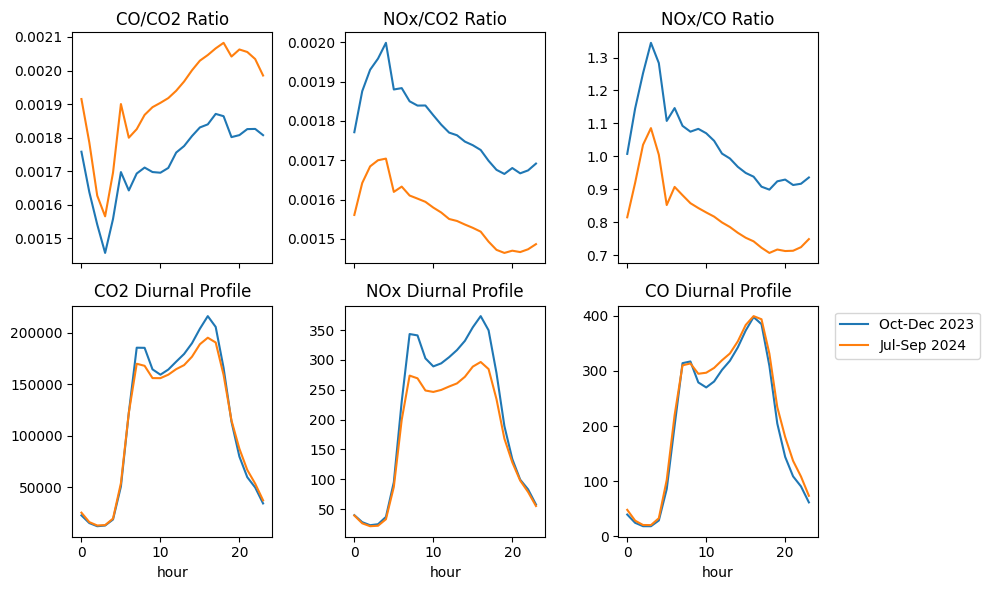

In [75]:
fig, ax = plt.subplots(2,3, figsize=(10, 6), sharex=True, tight_layout=True)

df_winter = df.loc['2023-10-01':'2023-12-31'].groupby('hour').mean()#.plot(ax=ax[0], label='2023')
df_summer = df.loc['2024-07-01':'2024-09-30'].groupby('hour').mean()

(df_winter['CO'] / df_winter['CO2']).plot(ax=ax[0,0], label='Oct-Dec 2023')
(df_summer['CO'] / df_summer['CO2']).plot(ax=ax[0,0], label='Jul-Sep 2024')
ax[0,0].set_title('CO/CO2 Ratio')

(df_winter['NOx'] / df_winter['CO2']).plot(ax=ax[0,1], label='Oct-Dec 2023')
(df_summer['NOx'] / df_summer['CO2']).plot(ax=ax[0,1], label='Jul-Sep 2024')
ax[0,1].set_title('NOx/CO2 Ratio')

(df_winter['NOx'] / df_winter['CO']).plot(ax=ax[0,2], label='Oct-Dec 2023')
(df_summer['NOx'] / df_summer['CO']).plot(ax=ax[0,2], label='Jul-Sep 2024')
ax[0,2].set_title('NOx/CO Ratio')

df_winter['CO2'].plot(ax=ax[1,0], label='Oct-Dec 2023')
df_summer['CO2'].plot(ax=ax[1,0], label='Jul-Sep 2024')
ax[1,0].set_title('CO2 Diurnal Profile')

df_winter['NOx'].plot(ax=ax[1,1], label='Oct-Dec 2023')
df_summer['NOx'].plot(ax=ax[1,1], label='Jul-Sep 2024')
ax[1,1].set_title('NOx Diurnal Profile')

df_winter['CO'].plot(ax=ax[1,2], label='Oct-Dec 2023')
df_summer['CO'].plot(ax=ax[1,2], label='Jul-Sep 2024')
ax[1,2].set_title('CO Diurnal Profile')      

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')